# non-binary

In [ ]:
# Import libraries and load data set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from math import log1p
import seaborn as sns
url = "winequality-red.csv"
pd.read_csv(url)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data = pd.read_csv(url)
# Scale the data
# Extract the features to be scaled
features = data.drop('quality', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled data
scaled_data['quality'] = data['quality']

# Split the data into input features (X) and the target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Randomly split the data into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

1279 320


In [ ]:
# Fit
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
model_l1.fit(X_train, y_train)
joblib.dump(model_l1, 'model_l1_weights.joblib')

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
model_l2.fit(X_train, y_train)
joblib.dump(model_l2, 'model_l2_weights.joblib')

model_elastic = LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet', solver='saga')
model_elastic.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

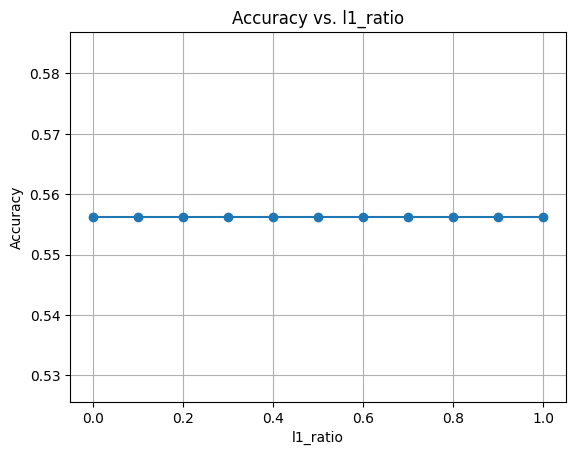

Best Accuracy: 0.55625
Best l1_ratio: 0.0
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 94 35  1  0]
 [ 0  0 46 82  4  0]
 [ 0  0  4 36  2  0]
 [ 0  0  0  4  1  0]]


NameError: ignored

<Figure size 400x400 with 0 Axes>

In [ ]:
l1_ratios = np.linspace(0, 1, 11)
l1_ratio_values = []
accuracies = []
models = []

for l1_ratio in l1_ratios:
    # Initialize the SGDClassifier with ElasticNet regularization
    model_elastic = LogisticRegression(l1_ratio=l1_ratio, max_iter=10000, penalty='elasticnet', solver='saga')

    # Train the model
    model_elastic.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = model_elastic.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store l1_ratio and accuracy values
    l1_ratio_values.append(l1_ratio)
    accuracies.append(accuracy)
    models.append(model_elastic)

# Plotting the accuracy values
plt.plot(l1_ratio_values, accuracies, marker='o')
plt.xlabel('l1_ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. l1_ratio')
plt.grid(True)
plt.show()

# Find the index of the best accuracy
best_accuracy_index = np.argmax(accuracies)

# Get the best accuracy and its corresponding l1_ratio
best_accuracy = accuracies[best_accuracy_index]
best_l1_ratio = l1_ratio_values[best_accuracy_index]

# Get the confusion matrix for the model with the best accuracy
best_model = models[best_accuracy_index]
confusion_mat = confusion_matrix(y_test, best_model.predict(X_test))

print("Best Accuracy:", best_accuracy)
print("Best l1_ratio:", best_l1_ratio)
print("Confusion Matrix:")
print(confusion_mat)

# Plotting the confusion matrices
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix Elastic Net')

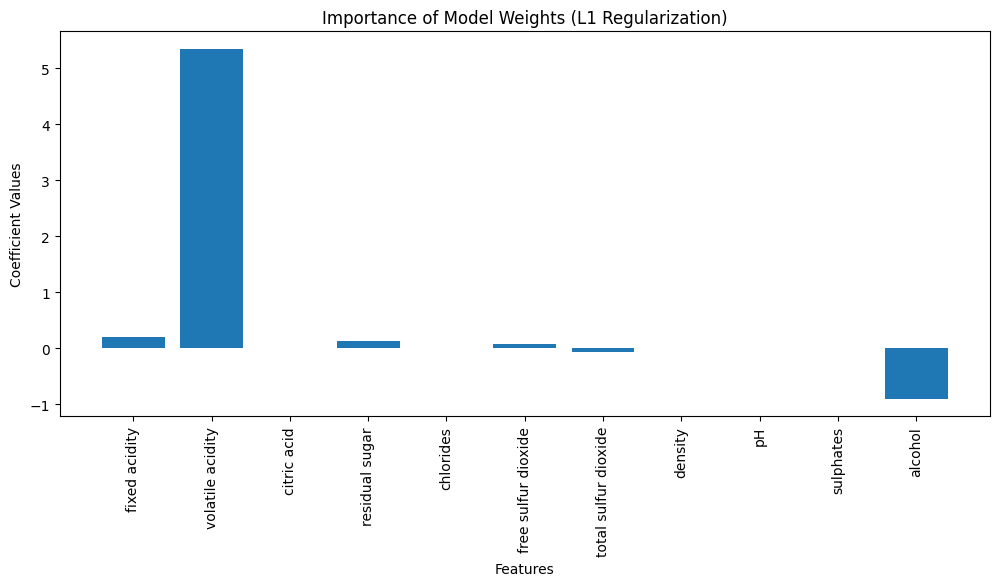

In [ ]:
# Visualize the weights
# Load the model
model_l1 = joblib.load('model_l1_weights.joblib')

# Extract the coefficients
coefficients = model_l1.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Create a bar plot to visualize the importance of each weight
plt.figure(figsize=(12, 5))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Importance of Model Weights (L1 Regularization)')
plt.xticks(rotation=90)
plt.show()

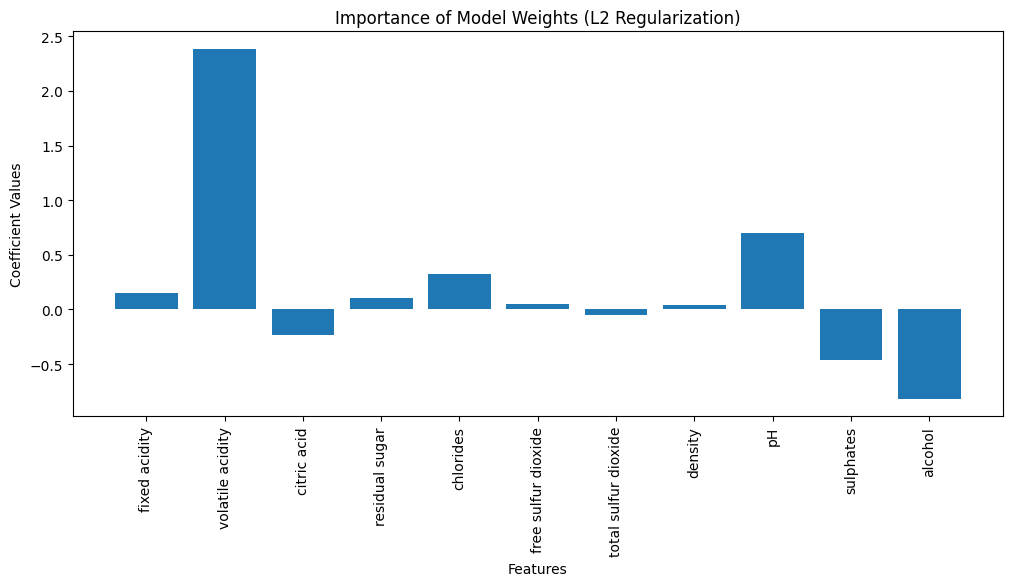

In [ ]:
model_l2 = joblib.load('model_l2_weights.joblib')

# Extract the coefficients
coefficients = model_l2.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Create a bar plot to visualize the importance of each weight
plt.figure(figsize=(12, 5))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Importance of Model Weights (L2 Regularization)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

print("L1 Regularization (Lasso):")
print(classification_report(y_test, y_pred_l1))

print("L2 Regularization (Ridge):")
print(classification_report(y_test, y_pred_l2))

print("ElasticNet Regularization:")
print(classification_report(y_test, y_pred_elastic))

L1 Regularization (Lasso):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.77      0.68       130
           6       0.54      0.62      0.58       132
           7       0.33      0.05      0.08        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.25      0.24      0.22       320
weighted avg       0.52      0.57      0.53       320

L2 Regularization (Ridge):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.75      0.68       130
           6       0.54      0.60      0.57       132
           7       0.35      0.14      0.20        42
           8       0.00      0.00      0.00         5

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Visualizing the result


In [ ]:
def compute_accuracy(confusion_matrix):
    # Sum of true positive and true negative predictions
    correct_predictions = np.diag(confusion_matrix).sum()
    total_predictions = confusion_matrix.sum()
    accuracy = correct_predictions / total_predictions

    return accuracy

In [ ]:
cm_l1 = confusion_matrix(y_test, y_pred_l1)
print("l1")
print("Accuracy:", compute_accuracy(cm_l1))
print(cm_l1)

cm_l2 = confusion_matrix(y_test, y_pred_l2)
print("l2")
print("Accuracy:", compute_accuracy(cm_l2))
print(cm_l2)

cm_elastic = confusion_matrix(y_test, y_pred_elastic)
print("elastic_0.5")
print("Accuracy:", compute_accuracy(cm_elastic))
print(cm_elastic)


l1
Accuracy: 0.575
[[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 100  30   0   0]
 [  0   0  48  82   2   0]
 [  0   0   3  37   2   0]
 [  0   0   0   3   2   0]]
l2
Accuracy: 0.571875
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 47 79  6  0]
 [ 0  0  3 33  6  0]
 [ 0  0  0  1  4  0]]
elastic_0.5
Accuracy: 0.55625
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 94 35  1  0]
 [ 0  0 46 82  4  0]
 [ 0  0  4 36  2  0]
 [ 0  0  0  4  1  0]]


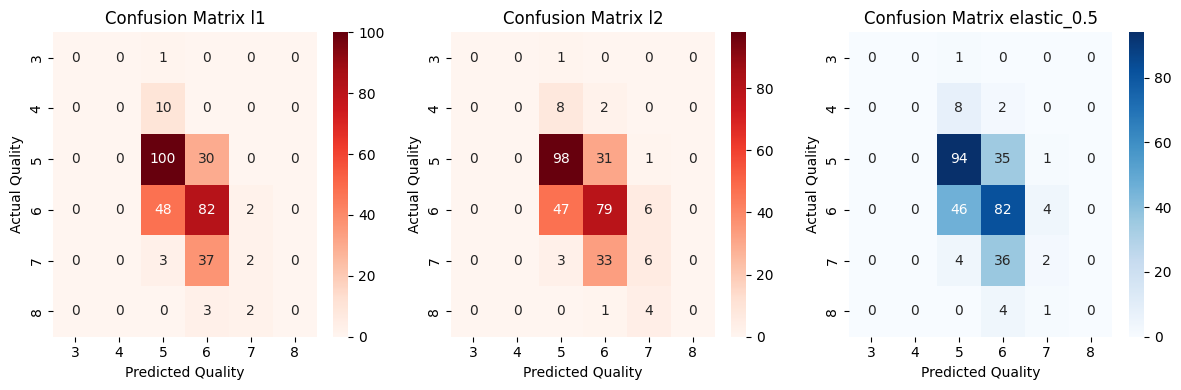

In [ ]:
labels = [3, 4, 5, 6, 7, 8]

# Plotting the confusion matrices
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm_l1, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix l1')

plt.subplot(1, 3, 2)
sns.heatmap(cm_l2, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix l2')

plt.subplot(1, 3, 3)
sns.heatmap(cm_elastic, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix elastic_0.5')

plt.tight_layout()
plt.show()

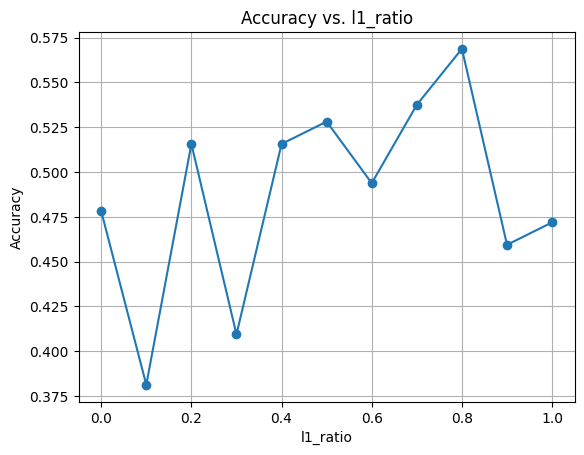

Best Accuracy: 0.56875
Best l1_ratio: 0.8
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 98 27  5  0]
 [ 0  0 45 64 23  0]
 [ 0  0  3 19 20  0]
 [ 0  0  0  1  4  0]]


Text(0.5, 1.0, 'Confusion Matrix Elastic Net')

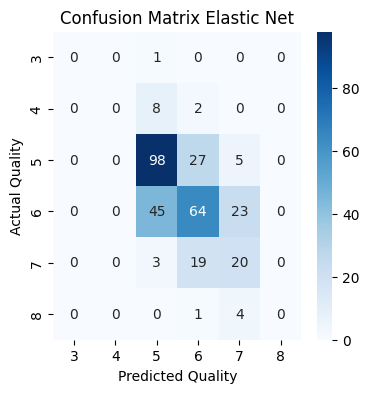

In [ ]:
l1_ratios = np.linspace(0, 1, 11)
l1_ratio_values = []
accuracies = []
models = []

for l1_ratio in l1_ratios:
    # Initialize the SGDClassifier with ElasticNet regularization
    model_elastic = SGDClassifier(loss='log_loss', penalty='elasticnet', l1_ratio=l1_ratio, max_iter=10000)

    # Train the model
    model_elastic.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = model_elastic.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store l1_ratio and accuracy values
    l1_ratio_values.append(l1_ratio)
    accuracies.append(accuracy)
    models.append(model_elastic)

# Plotting the accuracy values
plt.plot(l1_ratio_values, accuracies, marker='o')
plt.xlabel('l1_ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. l1_ratio')
plt.grid(True)
plt.show()

# Find the index of the best accuracy
best_accuracy_index = np.argmax(accuracies)

# Get the best accuracy and its corresponding l1_ratio
best_accuracy = accuracies[best_accuracy_index]
best_l1_ratio = l1_ratio_values[best_accuracy_index]

# Get the confusion matrix for the model with the best accuracy
best_model = models[best_accuracy_index]
confusion_mat = confusion_matrix(y_test, best_model.predict(X_test))

print("Best Accuracy:", best_accuracy)
print("Best l1_ratio:", best_l1_ratio)
print("Confusion Matrix:")
print(confusion_mat)

# Plotting the confusion matrices
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix Elastic Net')

# Binary

In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv(url)

# Scale the data
# Extract the features to be scaled
features = data.drop('quality', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled data
scaled_data['quality'] = data['quality']

# Create binary labels based on the quality column
data['label'] = data['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')

# Select the features and labels for the logistic regression
X = data.drop(['quality', 'label'], axis=1)
y = data['label']
print(X, y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
model_l1.fit(X_train, y_train)

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
model_l2.fit(X_train, y_train)

model_elastic = LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet', solver='saga')
model_elastic.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

In [ ]:
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

cm_l1 = confusion_matrix(y_test, y_pred_l1)
print("l1")
print("Accuracy:", compute_accuracy(cm_l1))
print(cm_l1)

cm_l2 = confusion_matrix(y_test, y_pred_l2)
print("l2")
print("Accuracy:", compute_accuracy(cm_l2))
print(cm_l2)

cm_elastic = confusion_matrix(y_test, y_pred_elastic)
print("elastic_0.5")
print("Accuracy:", compute_accuracy(cm_elastic))
print(cm_elastic)

l1
Accuracy: 0.7375
[[105  36]
 [ 48 131]]
l2
Accuracy: 0.740625
[[107  34]
 [ 49 130]]
elastic_0.5
Accuracy: 0.7125
[[ 97  44]
 [ 48 131]]


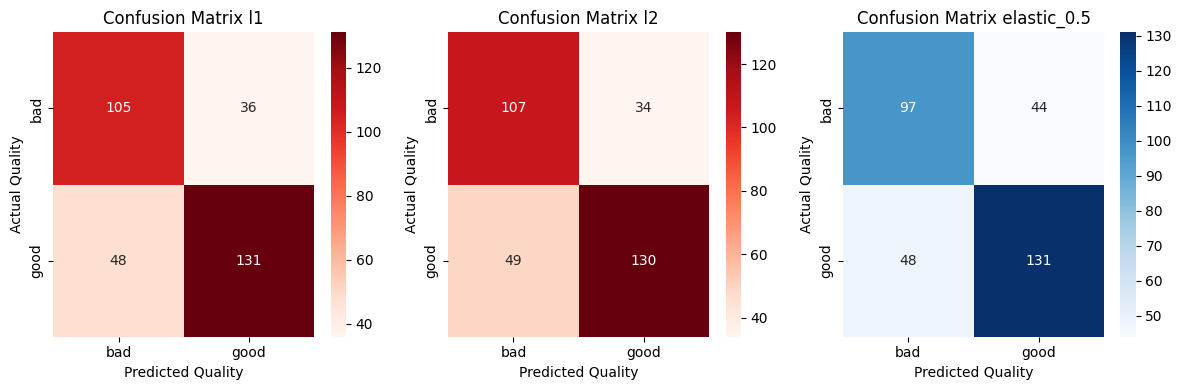

In [ ]:
labels = ['bad', 'good']

# Plotting the confusion matrices
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm_l1, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix l1')

plt.subplot(1, 3, 2)
sns.heatmap(cm_l2, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix l2')

plt.subplot(1, 3, 3)
sns.heatmap(cm_elastic, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix elastic_0.5')

plt.tight_layout()
plt.show()

In [ ]:
print("L1 Regularization (Lasso):")
print(classification_report(y_test, y_pred_l1))

print("L2 Regularization (Ridge):")
print(classification_report(y_test, y_pred_l2))

print("Elastic Net Regularization:")
print(classification_report(y_test, y_pred_elastic))

L1 Regularization (Lasso):
              precision    recall  f1-score   support

         bad       0.69      0.74      0.71       141
        good       0.78      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

L2 Regularization (Ridge):
              precision    recall  f1-score   support

         bad       0.69      0.76      0.72       141
        good       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

Elastic Net Regularization:
              precision    recall  f1-score   support

         bad       0.67      0.69      0.68       141
        good       0.75      0.73      0.74       179

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71   

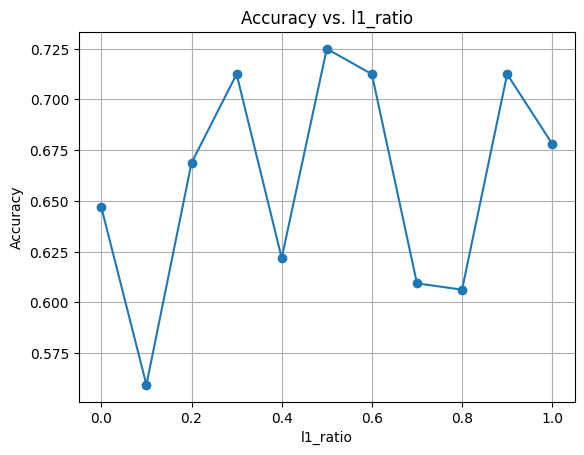

Best Accuracy: 0.725
Best l1_ratio: 0.5
Confusion Matrix:
[[115  26]
 [ 62 117]]


Text(0.5, 1.0, 'Confusion Matrix Elastic Net')

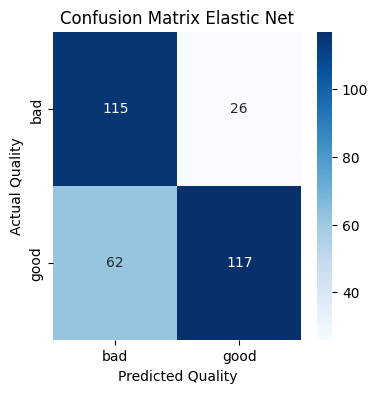

In [ ]:
l1_ratios = np.linspace(0, 1, 11)
l1_ratio_values = []
accuracies = []
models = []

for l1_ratio in l1_ratios:
    # Initialize the SGDClassifier with ElasticNet regularization
    model_elastic = SGDClassifier(loss='log_loss', penalty='elasticnet', l1_ratio=l1_ratio, max_iter=10000)

    # Train the model
    model_elastic.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = model_elastic.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store l1_ratio and accuracy values
    l1_ratio_values.append(l1_ratio)
    accuracies.append(accuracy)
    models.append(model_elastic)

# Plotting the accuracy values
plt.plot(l1_ratio_values, accuracies, marker='o')
plt.xlabel('l1_ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. l1_ratio')
plt.grid(True)
plt.show()

# Find the index of the best accuracy
best_accuracy_index = np.argmax(accuracies)

# Get the best accuracy and its corresponding l1_ratio
best_accuracy = accuracies[best_accuracy_index]
best_l1_ratio = l1_ratio_values[best_accuracy_index]

# Get the confusion matrix for the model with the best accuracy
best_model = models[best_accuracy_index]
confusion_mat = confusion_matrix(y_test, best_model.predict(X_test))

print("Best Accuracy:", best_accuracy)
print("Best l1_ratio:", best_l1_ratio)
print("Confusion Matrix:")
print(confusion_mat)

# Plotting the confusion matrices
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix Elastic Net')

In [ ]:
# Preprocess the new data
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density	pH,	sulphates, alcohol, quality
new_data = np.array([7.2, 0.5, 0.36, 2.5, 0.078, 15.0, 72.0, 0.997, 3.4, 0.68, 10.2])

# Load the trained model
model = LogisticRegression(penalty='l2', solver='lbfgs')

# Load the saved model weights
model.load_weights('model_weights.h5')

# Plug in the new data
predicted_label = model.predict([new_data])

# Print the predicted label
print("Predicted Label:", predicted_label)